# Predictive Thyroid Disease Project - Data Wrangling

To make a predictive model where you input factors of a person and have it predict if they are likely to have thyroid disease or not. The accuracy has to be above 95% to be considered successful.

# Initial Set Up

In [47]:
# Import Common Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

# Import my custom library 
import MyCustDataSciLib as MyCustDataSciLib

In [2]:
# Load Data
file_path = "Thyroid_Disease.csv"
df = pd.read_csv(file_path)

In [3]:
# Display Info, number of rows, column names, and column data types
    # there are 383 entries and each columns's non null count are 383 so no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
# Display the first few rows
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Display the last few rows
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [6]:
# get random sample of df 

'''
# Get random rows
df.sample(n=5, random_state=42)

# Get 10% of rows randomly
df.sample(frac=0.01,random_state=42)

# To get stratified sample based on a column
df.groupby('column_name').sample(n=2)

# get remaining samples
remaining = df.drop(sample.index)
'''

df.sample(n=5, random_state=42)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
268,32,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
250,30,F,No,No,No,Subclinical Hypothyroidism,Normal,Right,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
318,30,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
331,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,I,Structural Incomplete,Yes
56,43,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No


In [7]:
# Display basic statistical details
    # 'count' is useless but the rest of the descriptive statistics may be useful
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [8]:
# Get the shape of the DataFrame
print(df.shape)

(383, 17)


# Reshaping Data

In [9]:
# reshape
    # not needed
'''
melted_df = pd.melt(df, id_vars=['id'], value_vars=['col1', 'col2'])
pivoted_df = melted_df.pivot(index='id', columns='variable', values='value')
'''

"\nmelted_df = pd.melt(df, id_vars=['id'], value_vars=['col1', 'col2'])\npivoted_df = melted_df.pivot(index='id', columns='variable', values='value')\n"

# Handle Missing Data

In [10]:
# Check for missing values
    # I know already check for missing data with .info() but double check with .isnull() 
    # and looks like no null values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

<Axes: >

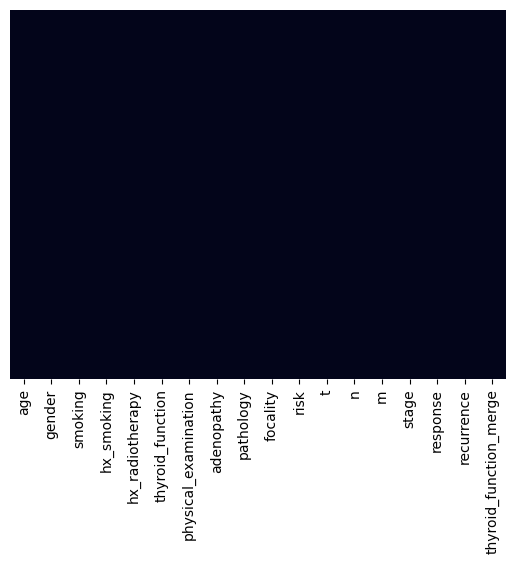

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# no null 

In [11]:
# fill in missing values
    # not needed as no missing values
'''
# Fill missing values with a specific value
df['column_name'].fillna(value, inplace=True)

# Fill missing values with the mean, median, or mode
df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Drop rows or columns with missing values
df.dropna(axis=0, inplace=True)  # Drop rows
df.dropna(axis=1, inplace=True)  # Drop columns

# functions from msno
'''

"\n# Fill missing values with a specific value\ndf['column_name'].fillna(value, inplace=True)\n\n# Fill missing values with the mean, median, or mode\ndf['column_name'].fillna(df['column_name'].mean(), inplace=True)\n\n# Drop rows or columns with missing values\ndf.dropna(axis=0, inplace=True)  # Drop rows\ndf.dropna(axis=1, inplace=True)  # Drop columns\n"

# Check the data range

In [12]:
df.describe()

# 'age' column is the only numeric column, all other data are categorical 
# The range of it is 15-82 years old,adn these ages are all within normalacy for humans and those with possible thyroid issues

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


# Check unique values in each column

In [13]:
# check each column for unique values
# mainly looking for columns with only 2 unique values which I can convert them in binary 0s and 1s
# the function will print out all the unique values
MyCustDataSciLib.print_unique_values_summary(df, 'all')
# I checked all the unique values and saw no misspelled or similar values

Unique values and counts for column: 'Age'
    Age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'Gender'
  Gender  count
0      F    312
1      M     71
----------------------------------------
Unique values and counts for column: 'Smoking'
  Smoking  count
0      No    334
1     Yes     49
----------------------------------------
Unique values and counts for column: 'Hx Smoking'
  Hx Smoking  count
0         No    355
1        Yes     28
----------------------------------------
Unique values and counts for column: 'Hx Radiothreapy'
  Hx Radiothreapy  count
0              No    376
1             Yes      7
----------------------------------------
Unique values and counts for column: 'Thyroid Function'
              Thyroid Function  count
0                    Eu

# Rename Columns Names for Consistency

In [14]:
# check columns before
    # reminder it is impossible for pandas to have duplicate columns as will override all duplicate columns with the last duplicate 
    # using pd.series as like how it looks in a vertical column 
pd.Series(df.columns)

# I notice there is a misspelling in one of the columns 'Hx Radiothreapy'

0                      Age
1                   Gender
2                  Smoking
3               Hx Smoking
4          Hx Radiothreapy
5         Thyroid Function
6     Physical Examination
7               Adenopathy
8                Pathology
9                 Focality
10                    Risk
11                       T
12                       N
13                       M
14                   Stage
15                Response
16                Recurred
dtype: object

In [15]:
# if column names have spaces, if so then replace with one underscore _ 
df = MyCustDataSciLib.replace_spaces_in_col_names(df, columns='all')
pd.Series(df.columns)

0                      Age
1                   Gender
2                  Smoking
3               Hx_Smoking
4          Hx_Radiothreapy
5         Thyroid_Function
6     Physical_Examination
7               Adenopathy
8                Pathology
9                 Focality
10                    Risk
11                       T
12                       N
13                       M
14                   Stage
15                Response
16                Recurred
dtype: object

In [16]:
# convert all column name letters to lower case 
df = MyCustDataSciLib.convert_col_names_to_lowercase(df,'all')
pd.Series(df.columns)

0                      age
1                   gender
2                  smoking
3               hx_smoking
4          hx_radiothreapy
5         thyroid_function
6     physical_examination
7               adenopathy
8                pathology
9                 focality
10                    risk
11                       t
12                       n
13                       m
14                   stage
15                response
16                recurred
dtype: object

In [17]:
# rename specific columns
    # I correct the typo in 'hx radiothreapy' to 
    # I changed 'Recurred' to 'Recurrence' which is proper and removes ambiguity for people with medical knowledge.

df = MyCustDataSciLib.rename_col_names(df, {
    'hx_radiothreapy':'hx_radiotherapy',
    'recurred':'recurrence'
    })
pd.Series(df.columns)

Column 'hx_radiothreapy' successfully renamed to 'hx_radiotherapy'.
Column 'recurred' successfully renamed to 'recurrence'.


0                      age
1                   gender
2                  smoking
3               hx_smoking
4          hx_radiotherapy
5         thyroid_function
6     physical_examination
7               adenopathy
8                pathology
9                 focality
10                    risk
11                       t
12                       n
13                       m
14                   stage
15                response
16              recurrence
dtype: object

In [18]:
# rename columns old methods
    # not needed 
'''
# override all column names
df.columns = ['col1', 'col2', 'col3']
'''

"\n# override all column names\ndf.columns = ['col1', 'col2', 'col3']\n"

# Rename Column Values for Consistency

In [19]:
# check out the unique values before edit
MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      F    312
1      M     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      No    334
1     Yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         No    355
1        Yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              No    376
1             Yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    Eu

In [20]:
# replace specific columns string value's spaces with underscores
df = MyCustDataSciLib.replace_spaces_in_col_values(df, 'all')

In [21]:
# make specific columns string value lower case
df = MyCustDataSciLib.convert_col_values_to_lowercase(df, 'all')

In [22]:
# replace specific columns values 
    # not needed 
'''
df = replace_col_values(df, columns='all', replacements=None)
'''

"\ndf = replace_col_values(df, columns='all', replacements=None)\n"

In [23]:
# check out the unique values after edit
MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [24]:
# other clean string methods
    # not needed
'''
df['column_name'] = df['column_name'].str.lower()
df['column_name'] = df['column_name'].str.replace('old', 'new')
'''

"\ndf['column_name'] = df['column_name'].str.lower()\ndf['column_name'] = df['column_name'].str.replace('old', 'new')\n"

# Merging the thyroid function column

In [25]:
MyCustDataSciLib.print_unique_values_summary(df, ['thyroid_function'])

Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    euthyroid    332
1     clinical_hyperthyroidism     20
2   subclinical_hypothyroidism     14
3      clinical_hypothyroidism     12
4  subclinical_hyperthyroidism      5
----------------------------------------
FUNCTION FINISHED, detected no columns with only 1 unique values which is good.


In [26]:
# the main objective is to make a model that can predict if you have thyroid disease or not.
# the column thyroid_function is this indicator but it has multiple values, but alot of these values are just different terms of thyroid disease.
# I thought about making a model to predict the different types of thyroid disease, but some of their data size is really small, as observed from checking the count of unique values in that column which was done in Data Wrangling step.
# thyroid function meaning
    # Euthyroid - Normal thyroid function. No signs of hyperthyroidism or hypothyroidism.
    # Hyperthyroidism - Thyroid produces excess thyroid hormones, leading to symptoms like weight loss, rapid heart rate, and anxiety.
    # Hypothyroidism - Thyroid does not produce enough hormones, leading to symptoms like fatigue, weight gain, and depression.
    # Clinical - The condition is symptomatic and clearly impacts the patient,
    # SubClinical - The condition is asymptomatic or mild, and abnormalities are only detected through lab tests (e.g., TSH levels). Hormone levels (T3, T4), may develop into clinical

In [27]:
df, incompatible_rows_info, incompatible_rows = MyCustDataSciLib.merge_into_new_binary_col(df,'thyroid_function',
                                                                                          ['clinical_hyperthyroidism','subclinical_hypothyroidism','clinical_hypothyroidism','subclinical_hyperthyroidism'],
                                                                                          'euthyroid',
                                                                                          'thyroid_function_merge',
                                                                                          'thyroid_disease',
                                                                                          'thyroid_normal'
                                                                                          )

New column "thyroid_function_merge" has been added with the converted categories


In [28]:
MyCustDataSciLib.print_unique_values_summary(df, ['thyroid_function'])
# check the old column has not been overrided

Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    euthyroid    332
1     clinical_hyperthyroidism     20
2   subclinical_hypothyroidism     14
3      clinical_hypothyroidism     12
4  subclinical_hyperthyroidism      5
----------------------------------------
FUNCTION FINISHED, detected no columns with only 1 unique values which is good.


In [29]:
MyCustDataSciLib.print_unique_values_summary(df, ['thyroid_function_merge'])
# as you can see all the different types of thyroid diseases have been aggregate into only the number 1 

Unique values and counts for column: 'thyroid_function_merge'
  thyroid_function_merge  count
0         thyroid_normal    332
1        thyroid_disease     51
----------------------------------------
FUNCTION FINISHED, detected no columns with only 1 unique values which is good.


In [30]:
df.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence,thyroid_function_merge
0,27,f,no,no,no,euthyroid,single_nodular_goiter-left,no,micropapillary,uni-focal,low,t1a,n0,m0,i,indeterminate,no,thyroid_normal
1,34,f,no,yes,no,euthyroid,multinodular_goiter,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
2,30,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
3,62,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
4,62,f,no,no,no,euthyroid,multinodular_goiter,no,micropapillary,multi-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal


# Handle Duplicate Values

In [31]:
# Check for duplicates values
df.duplicated().sum()

19

In [32]:
# Display all duplicate rows
    # appears all the duplicates are real data. It's because they don't have the names of the patients due to patient privacy, thus some data look similar.
    # of course this is just an assumption, but will continue with the data under this assumption.
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence,thyroid_function_merge
32,36,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
38,40,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
40,51,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no,thyroid_normal
66,35,f,no,no,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,low,t1b,n0,m0,i,excellent,no,thyroid_normal
69,51,f,no,no,no,euthyroid,single_nodular_goiter-left,no,papillary,uni-focal,low,t1b,n0,m0,i,excellent,no,thyroid_normal


In [33]:
# Drop duplicates
    # not needed as assume no duplicate data
'''
df.drop_duplicates(inplace=True)
'''

'\ndf.drop_duplicates(inplace=True)\n'

# Change Data Types

In [34]:
# Change Data types
    # not needed
'''
df['Smoking'].replace({'Yes': 1, 'No': 0}, inplace=True) 
df['column_name'] = df['column_name'].astype('int')
df['column_name'] = pd.to_datetime(df['column_name'])
'''

"\ndf['Smoking'].replace({'Yes': 1, 'No': 0}, inplace=True) \ndf['column_name'] = df['column_name'].astype('int')\ndf['column_name'] = pd.to_datetime(df['column_name'])\n"

# Filter Data

In [35]:
# Filter data
    # not needed
'''filtered_df = df[df['column_name'] > value]'''

"filtered_df = df[df['column_name'] > value]"

# Select & Drop Columns

In [36]:
# select and drop columns
    # not needed

'''
df.drop(columns=['col1', 'col2'], inplace=True)
'''

"\ndf.drop(columns=['col1', 'col2'], inplace=True)\n"

# Modify & Group Data

In [37]:
# Modify Columns
    # not needed

'''
df['new_column'] = df['col1'] + df['col2']
df['modified_col'] = df['column_name'].apply(lambda x: x**2)"Capstone 2 - Thyroid Disease.pdf"
'''

'\ndf[\'new_column\'] = df[\'col1\'] + df[\'col2\']\ndf[\'modified_col\'] = df[\'column_name\'].apply(lambda x: x**2)"Capstone 2 - Thyroid Disease.pdf"\n'

In [38]:
# Group and Aggregate data

'''
grouped = df.groupby('column_name').agg({'col1': 'sum', 'col2': 'mean'})
grouped.reset_index(inplace=True)
'''


"\ngrouped = df.groupby('column_name').agg({'col1': 'sum', 'col2': 'mean'})\ngrouped.reset_index(inplace=True)\n"

# Sort Columns

In [39]:
# Sort columns 
    # not needed

'''
df.sort_values(by='column_name', ascending=True, inplace=True)
'''

"\ndf.sort_values(by='column_name', ascending=True, inplace=True)\n"

# Scaling & normalizing data

In [40]:
# scaling and normalizing data
    # not needed

'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_column'] = scaler.fit_transform(df[['original_column']])

df['log_scaled_column'] = np.log(df['original_column'] + 1)  # Add 1 to avoid log(0)
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\ndf['scaled_column'] = scaler.fit_transform(df[['original_column']])\n\ndf['log_scaled_column'] = np.log(df['original_column'] + 1)  # Add 1 to avoid log(0)\n"

# Handling Outliers

In [41]:
# Detect Outliers
# age is the only column with a continuous range of numbers so will see if any age is considered an outlier
outlier_rows_info, outlier_rows = MyCustDataSciLib.detect_outliers_in_col(df, 'age')

Detecting outliers for the 'age' column.
Lower bounds:   -4.0
Q1:             29.0
Q3:             51.0
Upper bounds:   84.0
'age' column has no outliers.


In [42]:
# remove outliers 
    # there are no outliers for this data so no need 
'''
df = df.drop(index=outlier_rows)
'''

'\ndf = df.drop(index=outlier_rows)\n'

# Export Clean Data

In [43]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('Thyroid_Disease_DataWrangled.csv', index=False)